<a href="https://colab.research.google.com/github/basmala-kamal/airline-visualization/blob/main/airline_merged_cleaning_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Uploading Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from dateutil.parser import isoparse
import re
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from google.colab import files

## Data Preprocessing

In [ ]:
df = pd.read_csv("/content/dsci2411.csv")
df.head(7)

legId searchDate flightDate startingAirport  \
0  e1b137527b9175d7d930c3af82e70ae0  4/19/2022  5/20/2022             OAK   
1  d813ebd107e3fa700206c0d96015da7a  4/19/2022  5/20/2022             OAK   
2  e8ece5ad6f5962c696e06e031fc2a24a  4/19/2022  5/20/2022             OAK   
3  c004a54681335100f326c9613b3c9448  4/19/2022  5/20/2022             OAK   
4  4a42bbf77211b4afa7b9e14005949120  4/19/2022  5/20/2022             OAK   
5  9157572cdd530976f707a162a4fcfde8  4/19/2022  5/20/2022             OAK   
6  1818c5a6f7059cfde40105cdacda9c29  4/19/2022  5/20/2022             OAK   

  destinationAirport travelDuration  isBasicEconomy  isRefundable  isNonStop  \
0                ATL        PT7H52M           False         False      False   
1                ATL        PT6H15M           False         False      False   
2                ATL         PT9H6M           False         False      False   
3                ATL        PT6H17M           False         False      False   
4                ATL       PT14H12M           False         False      False   
5                ATL         PT9H8M            True         False      False   
6                ATL       PT14H13M           False         False      False   

   totalFare  ...  segmentsArrivalTimeEpochSeconds  \
0     103.98  ...           1653107460||1653126600   
1     216.58  ...           1653067080||1653084660   
2     216.58  ...           1653056820||1653084660   
3     237.58  ...           1653110940||1653127980   
4     307.21  ...           1653115560||1653159180   
5     318.60  ...           1653061020||1653086280   
6     366.58  ...           1653082260||1653127980   

                              segmentsArrivalTimeRaw  \
0  2022-05-20T22:31:00.000-06:00||2022-05-21T05:5...   
1  2022-05-20T10:18:00.000-07:00||2022-05-20T18:1...   
2  2022-05-20T07:27:00.000-07:00||2022-05-20T18:1...   
3  2022-05-20T22:29:00.000-07:00||2022-05-21T06:1...   
4  2022-05-20T23:46:00.000-07:00||2022-05-21T14:5...   
5  2022-05-20T08:37:00.000-07:00||2022-05-20T18:3...   
6  2022-05-20T14:31:00.000-07:00||2022-05-21T06:1...   

  segmentsArrivalAirportCode segmentsDepartureAirportCode  \
0                   DEN||ATL                     OAK||DEN   
1                   LAX||ATL                     OAK||LAX   
2                   LAX||ATL                     OAK||LAX   
3                   LAS||ATL                     OAK||LAS   
4                   SEA||ATL                     OAK||SEA   
5                   SEA||ATL                     OAK||SEA   
6                   LAS||ATL                     OAK||LAS   

                    segmentsAirlineName segmentsAirlineCode  \
0  Frontier Airlines||Frontier Airlines              F9||F9   
1      Spirit Airlines||Spirit Airlines              NK||NK   
2      Spirit Airlines||Spirit Airlines              NK||NK   
3      Spirit Airlines||Spirit Airlines              NK||NK   
4      Alaska Airlines||Alaska Airlines              AS||AS   
5      Alaska Airlines||Alaska Airlines              AS||AS   
6      Spirit Airlines||Spirit Airlines              NK||NK   

                        segmentsEquipmentDescription  \
0                                      ||Airbus A320   
1                  ||AIRBUS INDUSTRIE A320 SHARKLETS   
2  AIRBUS INDUSTRIE A320 SHARKLETS||AIRBUS INDUST...   
3       AIRBUS INDUSTRIE A320 SHARKLETS||Airbus A319   
4                     Boeing 737-900||Boeing 737-900   
5                     Boeing 737-800||Boeing 737-900   
6       AIRBUS INDUSTRIE A320 SHARKLETS||Airbus A319   

  segmentsDurationInSeconds segmentsDistance segmentsCabinCode  
0               9180||10620        943||1207      coach||coach  
1               4920||15600       None||None      coach||coach  
2               4920||15600       None||None      coach||coach  
3               5580||13980       None||None      coach||coach  
4               7500||17580        672||2178      coach||coach  
5               7620||17820        672||2178      coach||

In [ ]:
df.shape

(527105, 23)

In [ ]:
df.columns

Index(['legId', 'searchDate', 'flightDate', 'startingAirport',
       'destinationAirport', 'travelDuration', 'isBasicEconomy',
       'isRefundable', 'isNonStop', 'totalFare', 'totalTravelDistance',
       'segmentsDepartureTimeEpochSeconds', 'segmentsDepartureTimeRaw',
       'segmentsArrivalTimeEpochSeconds', 'segmentsArrivalTimeRaw',
       'segmentsArrivalAirportCode', 'segmentsDepartureAirportCode',
       'segmentsAirlineName', 'segmentsAirlineCode',
       'segmentsEquipmentDescription', 'segmentsDurationInSeconds',
       'segmentsDistance', 'segmentsCabinCode'],
      dtype='object')

In [ ]:
df.drop(columns=['segmentsCabinCode'], inplace=True, axis=1)
df.shape

(527105, 22)

In [ ]:
print(df.isna().sum())


legId                                    0
searchDate                               0
flightDate                               0
startingAirport                          0
destinationAirport                       0
travelDuration                           0
isBasicEconomy                           0
isRefundable                             0
isNonStop                                0
totalFare                                0
totalTravelDistance                  68042
segmentsDepartureTimeEpochSeconds        0
segmentsDepartureTimeRaw                 0
segmentsArrivalTimeEpochSeconds          0
segmentsArrivalTimeRaw                   0
segmentsArrivalAirportCode               0
segmentsDepartureAirportCode             0
segmentsAirlineName                      0
segmentsAirlineCode                      0
segmentsEquipmentDescription          2427
segmentsDurationInSeconds                0
segmentsDistance                      3628
dtype: int64


In [ ]:
df = df.dropna()
df.shape

(458419, 22)

In [ ]:
print(df.isna().sum())


legId                                0
searchDate                           0
flightDate                           0
startingAirport                      0
destinationAirport                   0
travelDuration                       0
isBasicEconomy                       0
isRefundable                         0
isNonStop                            0
totalFare                            0
totalTravelDistance                  0
segmentsDepartureTimeEpochSeconds    0
segmentsDepartureTimeRaw             0
segmentsArrivalTimeEpochSeconds      0
segmentsArrivalTimeRaw               0
segmentsArrivalAirportCode           0
segmentsDepartureAirportCode         0
segmentsAirlineName                  0
segmentsAirlineCode                  0
segmentsEquipmentDescription         0
segmentsDurationInSeconds            0
segmentsDistance                     0
dtype: int64


In [ ]:
def convert_duration(iso_duration):
    if not isinstance(iso_duration, str):  # Ensure the input is a string
        return None  # Return None for invalid or missing inputs
    match = re.match(r'PT(?:(\d+)H)?(?:(\d+)M)?', iso_duration)
    if match:
        hours = int(match.group(1) or 0)
        minutes = int(match.group(2) or 0)
        decimal_hours = round(hours + minutes / 60, 2)
        return decimal_hours
    return None  # Return None for invalid format

In [ ]:
df['travelDuration'] = df['travelDuration'].apply(convert_duration)
df.head(5)

legId searchDate flightDate startingAirport  \
0  e1b137527b9175d7d930c3af82e70ae0  4/19/2022  5/20/2022             OAK   
4  4a42bbf77211b4afa7b9e14005949120  4/19/2022  5/20/2022             OAK   
5  9157572cdd530976f707a162a4fcfde8  4/19/2022  5/20/2022             OAK   
7  e8baed3d41a0c35856f7591a5baad060  4/19/2022  5/20/2022             OAK   
8  965e29ef7e8d11bf05f723a28ab8e4e0  4/19/2022  5/20/2022             OAK   

  destinationAirport  travelDuration  isBasicEconomy  isRefundable  isNonStop  \
0                ATL            7.87           False         False      False   
4                ATL           14.20           False         False      False   
5                ATL            9.13            True         False      False   
7                ATL           13.23           False         False      False   
8                ATL           12.67           False         False      False   

   totalFare  ...                           segmentsDepartureTimeRaw  \
0     103.98  ...  2022-05-20T18:58:00.000-07:00||2022-05-21T00:5...   
4     307.21  ...  2022-05-20T21:41:00.000-07:00||2022-05-21T07:0...   
5     318.60  ...  2022-05-20T06:30:00.000-07:00||2022-05-20T10:4...   
7     410.69  ...  2022-05-20T16:04:00.000-07:00||2022-05-20T19:3...   
8     437.71  ...  2022-05-20T17:18:00.000-07:00||2022-05-20T20:5...   

      segmentsArrivalTimeEpochSeconds  \
0              1653107460||1653126600   
4              1653115560||1653159180   
5              1653061020||1653086280   
7  1653092700||1653113820||1653135480   
8  1653099300||1653111900||1653137880   

                              segmentsArrivalTimeRaw  \
0  2022-05-20T22:31:00.000-06:00||2022-05-21T05:5...   
4  2022-05-20T23:46:00.000-07:00||2022-05-21T14:5...   
5  2022-05-20T08:37:00.000-07:00||2022-05-20T18:3...   
7  2022-05-20T17:25:00.000-07:00||2022-05-21T01:1...   
8  2022-05-20T20:15:00.000-06:00||2022-05-21T00:4...   

  segmentsArrivalAirportCode segmentsDepartureAirportCode  \
0                   DEN||ATL                     OAK||DEN   
4                   SEA||ATL                     OAK||SEA   
5                   SEA||ATL                     OAK||SEA   
7              LAX||MEM||ATL                OAK||LAX||MEM   
8              SLC||AUS||ATL                OAK||SLC||AUS   

                    segmentsAirlineName segmentsAirlineCode  \
0  Frontier Airlines||Frontier Airlines              F9||F9   
4      Alaska Airlines||Alaska Airlines              AS||AS   
5      Alaska Airlines||Alaska Airlines              AS||AS   
7                   Delta||Delta||Delta          DL||DL||DL   
8                   Delta||Delta||Delta          DL||DL||DL   

                        segmentsEquipmentDescription  \
0                                      ||Airbus A320   
4                     Boeing 737-900||Boeing 737-900   
5                     Boeing 737-800||Boeing 737-900   
7  Embraer 175 (Enhanced Winglets)||Boeing 737-80...   
8  Embraer 175 (Enhanced Winglets)||Airbus A220-1...   

  segmentsDurationInSeconds segmentsDistance  
0               9180||10620        943||1207  
4               7500||17580        672||2178  
5               7620||17820        672||2178  
7         4860||13320||4380   338||1615||332  
8          7020||9960||7980   588||1078||811  

[5 rows x 22 columns]

In [ ]:
# Counting the number of stops
df['transits_count'] = df['segmentsArrivalAirportCode'].apply(
    lambda x: x.count('||') if isinstance(x, str) else 0)

In [ ]:
df['searchDate'] = pd.to_datetime(df['searchDate'], format='%m/%d/%Y')
df['flightDate'] = pd.to_datetime(df['flightDate'], format='%m/%d/%Y')

df['days_to_flight'] = (df['flightDate'] - df['searchDate']).dt.days

df['searchDayOfWeek'] = df['searchDate'].dt.day_name()
df['flightDayOfWeek'] = df['flightDate'].dt.day_name()
df['searchMonth'] = df['searchDate'].dt.month_name()
df['flightMonth'] = df['flightDate'].dt.month_name()

In [ ]:
#Extract the First Airline Name
df['firstAirlineName'] = df['segmentsAirlineName'].str.extract(r'(^[^|]+)')[0]
df.shape

(458419, 29)

In [ ]:
df.columns

Index(['legId', 'searchDate', 'flightDate', 'startingAirport',
       'destinationAirport', 'travelDuration', 'isBasicEconomy',
       'isRefundable', 'isNonStop', 'totalFare', 'totalTravelDistance',
       'segmentsDepartureTimeEpochSeconds', 'segmentsDepartureTimeRaw',
       'segmentsArrivalTimeEpochSeconds', 'segmentsArrivalTimeRaw',
       'segmentsArrivalAirportCode', 'segmentsDepartureAirportCode',
       'segmentsAirlineName', 'segmentsAirlineCode',
       'segmentsEquipmentDescription', 'segmentsDurationInSeconds',
       'segmentsDistance', 'transits_count', 'days_to_flight',
       'searchDayOfWeek', 'flightDayOfWeek', 'searchMonth', 'flightMonth',
       'firstAirlineName'],
      dtype='object')

In [ ]:
df.to_csv('DSCI_G.csv', index=False)

## Exploratory Data Analysis (EDA)

### Univariate Analysis

In [ ]:
print("Summary Statistics for Numerical Features:")
print(df[['totalFare', 'totalTravelDistance', 'transits_count', 'days_to_flight']].describe())

Summary Statistics for Numerical Features:
           totalFare  totalTravelDistance  transits_count  days_to_flight
count  458419.000000        458419.000000   458419.000000   458419.000000
mean      606.818529          2340.605180        1.497058       27.884429
std       209.552843           768.979131        0.523171       17.086248
min        43.980000           338.000000        0.000000        1.000000
25%       487.600000          1836.000000        1.000000       13.000000
50%       588.110000          2558.000000        2.000000       27.000000
75%       712.700000          2945.000000        2.000000       42.000000
max      3184.110000          3761.000000        3.000000       60.000000


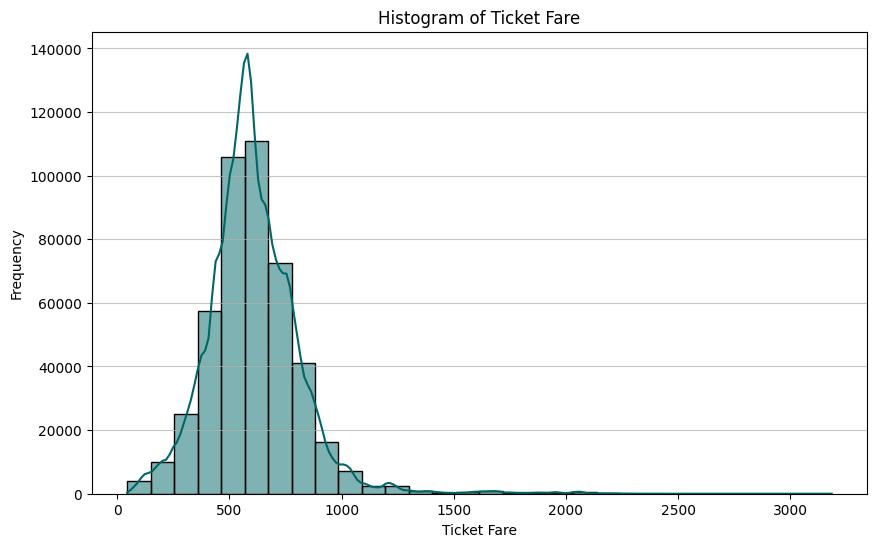

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['totalFare'], bins=30, kde=True, color='#006666')
plt.title('Histogram of Ticket Fare')
plt.xlabel('Ticket Fare')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

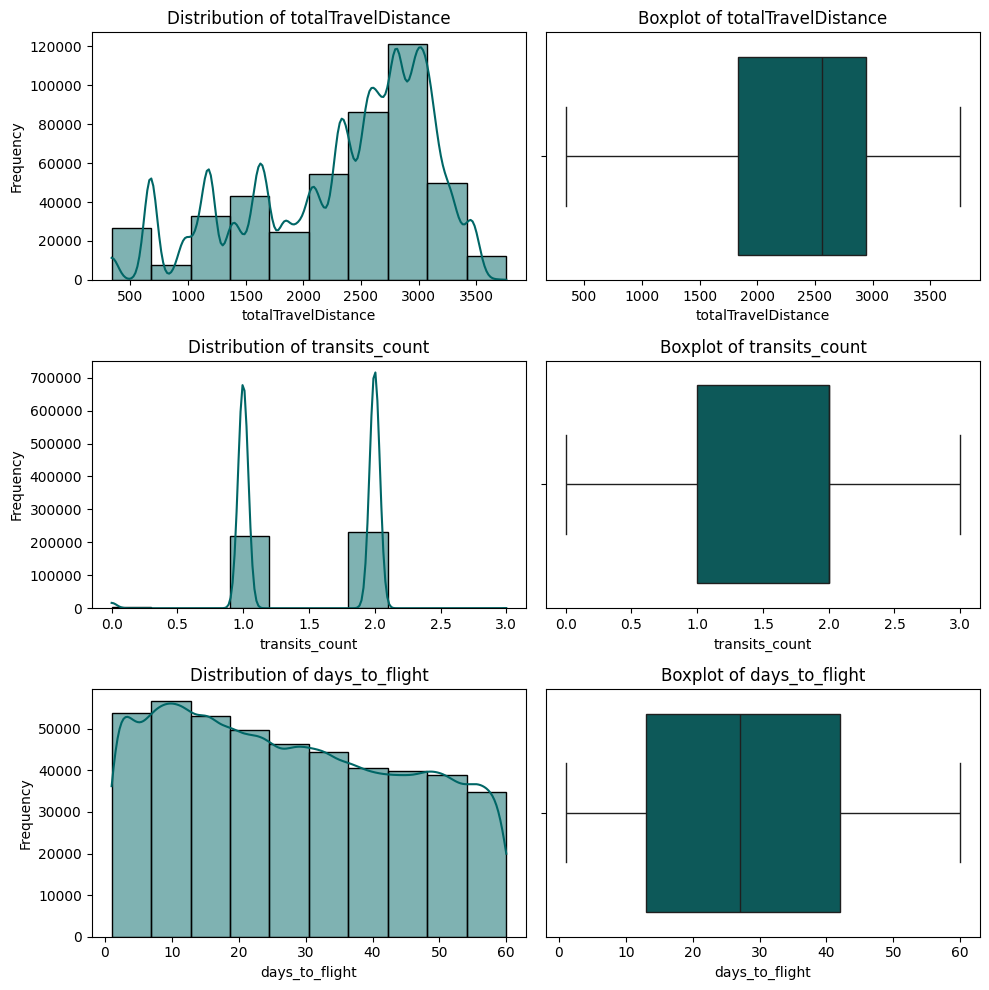

In [ ]:
plt.figure(figsize=(10, 10))
# Histogram and Boxplot for each attribute
features = ['totalTravelDistance', 'transits_count', 'days_to_flight']
for i, feature in enumerate(features):
    plt.subplot(len(features), 2, 2 * i + 1)
    sns.histplot(df[feature], kde=True, bins=10, color='#006666')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.subplot(len(features), 2, 2 * i + 2)
    sns.boxplot(x=df[feature], color='#006666')
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)
plt.tight_layout()
plt.show()

<ipython-input-19-7d13d5da6a67>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='isNonStop', data=df, palette=['#ff6060', '#006666'])


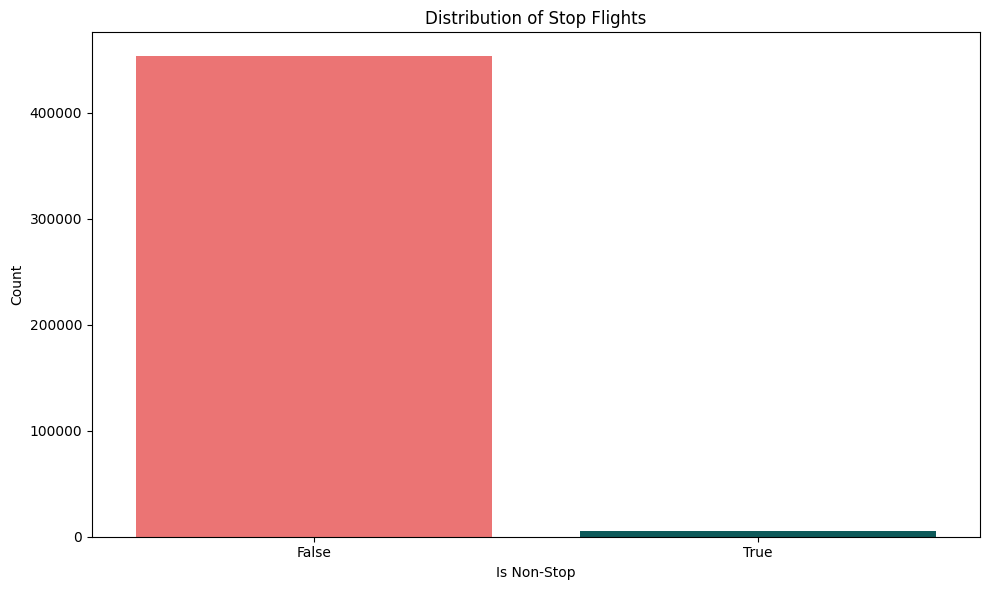

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='isNonStop', data=df, palette=['#ff6060', '#006666'])
plt.title('Distribution of Stop Flights')
plt.xlabel('Is Non-Stop')
plt.ylabel('Count')
plt.xticks([0, 1], ['False', 'True'])
plt.tight_layout()
plt.show()

<ipython-input-18-5c3d0a0d3f49>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='isBasicEconomy', data=df, palette=['#ff6060', '#006666'])


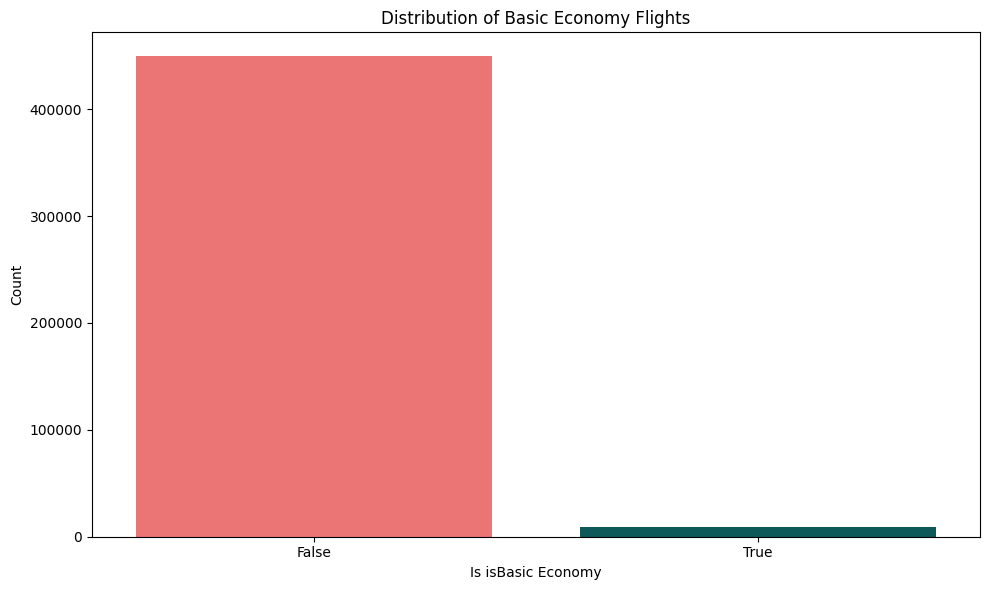

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='isBasicEconomy', data=df, palette=['#ff6060', '#006666'])
plt.title('Distribution of Basic Economy Flights')
plt.xlabel('Is isBasic Economy')
plt.ylabel('Count')
plt.xticks([0, 1], ['False', 'True'])
plt.tight_layout()
plt.show()

<ipython-input-192-cff8817306a4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='destinationAirport', data=df, palette=color15_mapping)


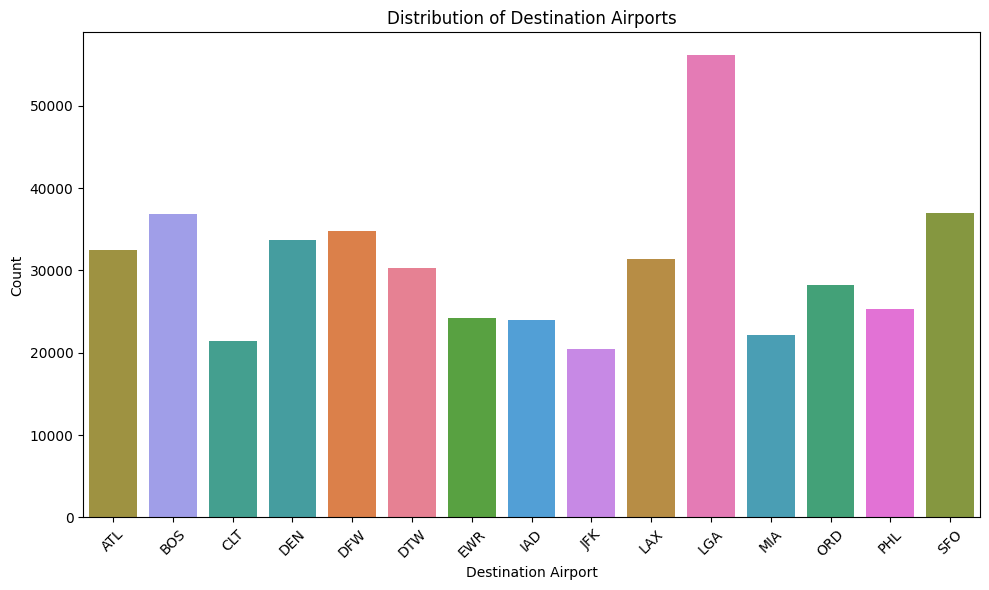

In [ ]:
plt.figure(figsize=(10, 6))
palette_15 = sns.color_palette("husl", n_colors=15)
categories_15 = ['DTW', 'DFW', 'LAX', 'ATL', 'SFO', 'EWR', 'ORD', 'CLT', 'DEN', 'MIA', 'IAD', 'BOS', 'JFK', 'PHL', 'LGA']
color15_mapping = dict(zip(categories_15, palette_15))
sns.countplot(x='destinationAirport', data=df, palette=color15_mapping)
plt.title('Distribution of Destination Airports')
plt.xlabel('Destination Airport')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Bivariate Analysis

In [ ]:
correlation = df['totalFare'].corr(df['totalTravelDistance'])
print(f"Correlation between Total Fare and Total Travel Distance: {correlation:.2f}")

Correlation between Total Fare and Total Travel Distance: 0.52


<ipython-input-156-f2e3ac15ecc3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='isNonStop', y='totalFare', data=df, palette=['#ff6060', '#006666'])


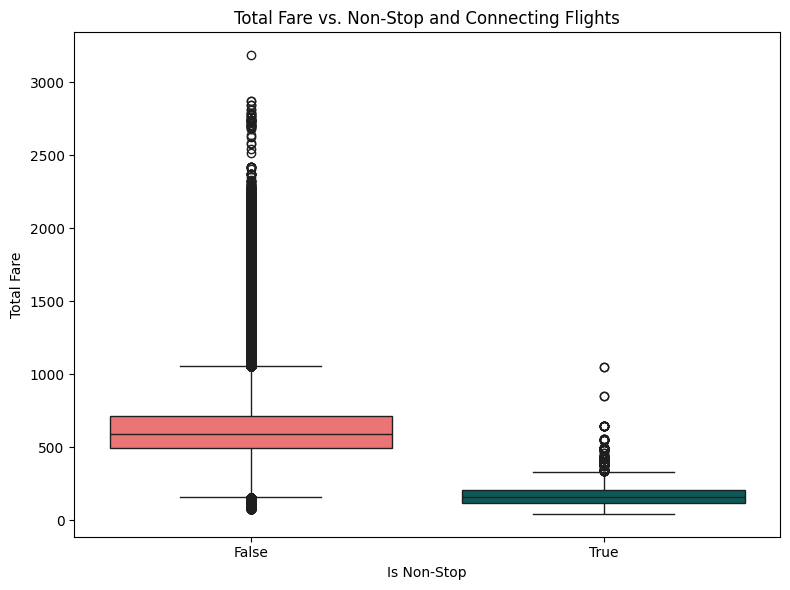

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='isNonStop', y='totalFare', data=df, palette=['#ff6060', '#006666'])
plt.title('Total Fare vs. Non-Stop and Connecting Flights')
plt.xlabel('Is Non-Stop')
plt.ylabel('Total Fare')
plt.xticks([0, 1], ['False', 'True'])
plt.tight_layout()
plt.show()

In [ ]:
g = sns.FacetGrid(df, col='firstAirlineName', col_wrap=3, height=4, aspect=1.2)
g.map(sns.scatterplot, 'transits_count', 'totalFare', alpha=0.7, color='#006666' )
g.map(sns.regplot, 'transits_count', 'totalFare', scatter=False, color='#ff6060', ci=None)
g.set_axis_labels('Number of Stops', 'Total Fare')
g.set_titles('Airline: {col_name}')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Total Fare vs Number of Stops by Airline')
plt.show()

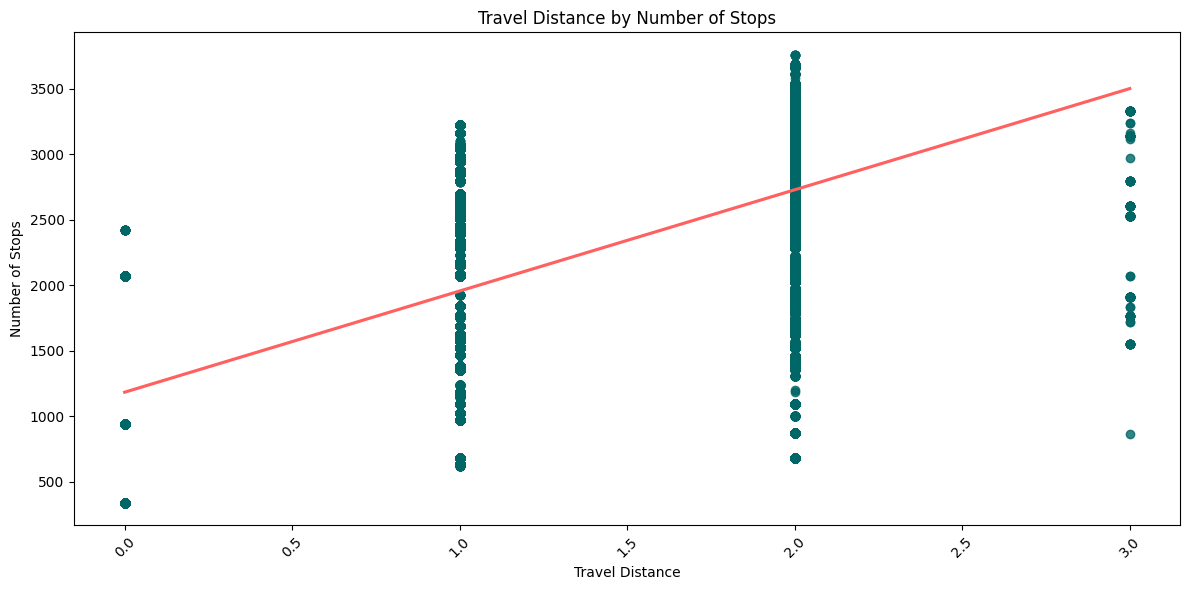

In [ ]:
plt.figure(figsize=(12, 6))
sns.regplot(x='transits_count', y='totalTravelDistance', data=df, scatter_kws={'color': '#006666'}, line_kws={'color': '#ff6060'})
plt.title('Travel Distance by Number of Stops')
plt.xlabel('Travel Distance')
plt.ylabel('Number of Stops')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

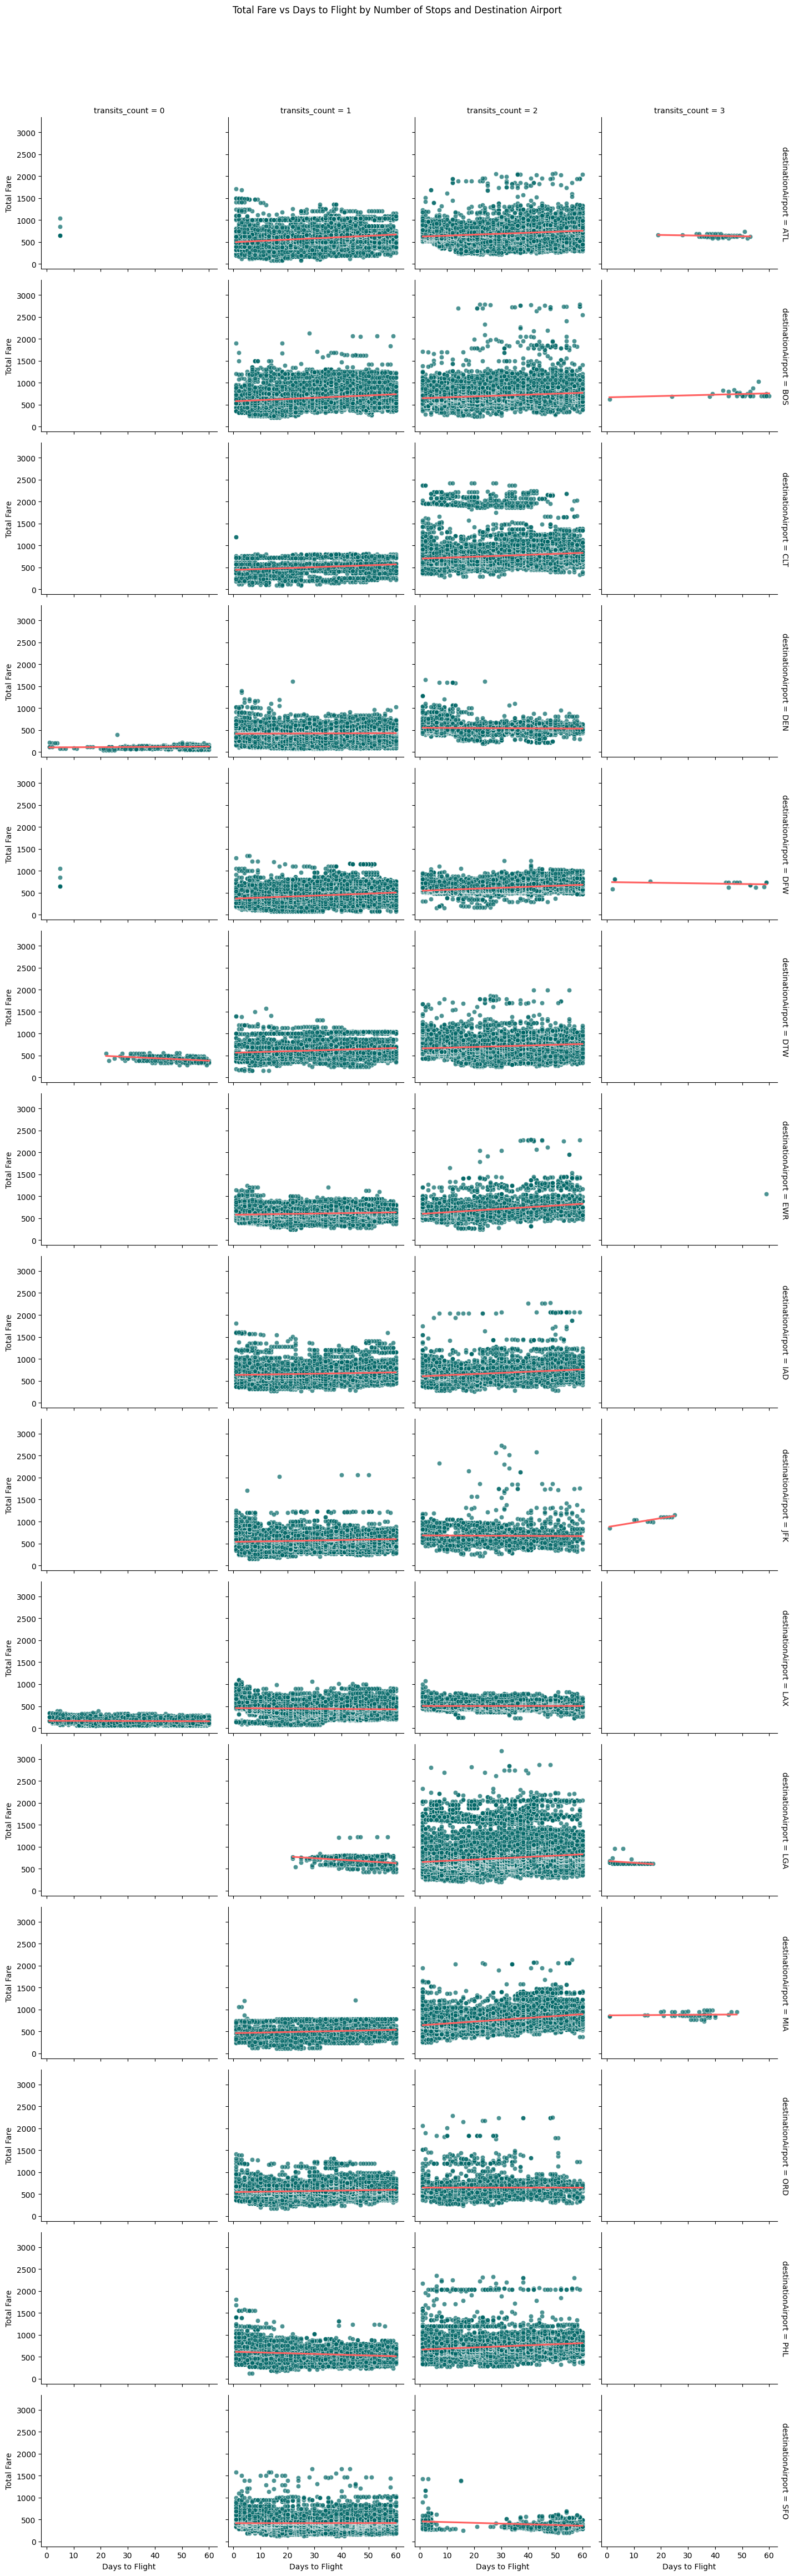

In [ ]:
df['destinationAirport'] = df['destinationAirport'].astype('category') # Ensure that 'destinationAirport' is treated as a categorical variable
# FacetGrid with rows for destinationAirport and columns for firstAirlineName
g = sns.FacetGrid(
    df, row='destinationAirport', col='transits_count', margin_titles=True, height=3, aspect=1.2
)
g.map(sns.scatterplot, 'days_to_flight', 'totalFare', alpha=0.7, color='#006666')
g.map(sns.regplot, 'days_to_flight', 'totalFare', scatter=False, color='#ff6060', ci=None)
g.set_axis_labels('Days to Flight', 'Total Fare')
g.fig.suptitle('Total Fare vs Days to Flight by Number of Stops and Destination Airport', y=1.03)
g.tight_layout()
plt.show()

<ipython-input-178-ac611ed87788>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='firstAirlineName', y='totalFare', data=df, palette=color5_mapping)


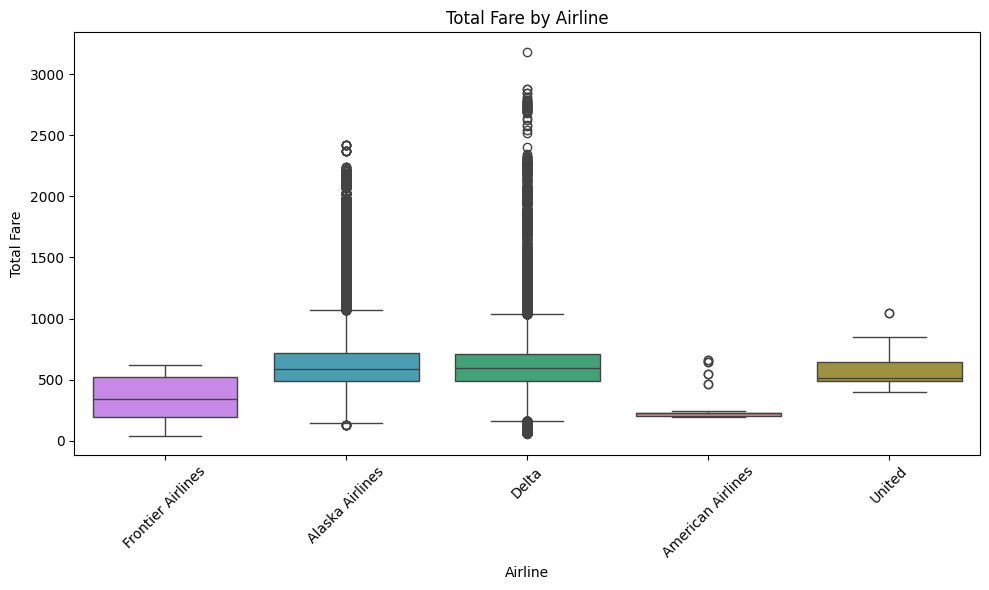

In [ ]:
# Saving the color palette to be used for all other plots with the same variables to reach consistency
palette_5 = sns.color_palette("husl", n_colors=5)
categories_5 = ['American Airlines', 'United', 'Delta', 'Alaska Airlines', 'Frontier Airlines']
color5_mapping = dict(zip(categories_5, palette_5))
plt.figure(figsize=(10, 6))
sns.boxplot(x='firstAirlineName', y='totalFare', data=df, palette=color5_mapping)
plt.title('Total Fare by Airline')
plt.xlabel('Airline')
plt.ylabel('Total Fare')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Multivariate

In [ ]:
#categorizing the days_to_flight into bins
bins = [0, 10, 20, 30, 40, 50, 60]
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60']
df['days_category'] = pd.cut(df['days_to_flight'], bins=bins, labels=labels)

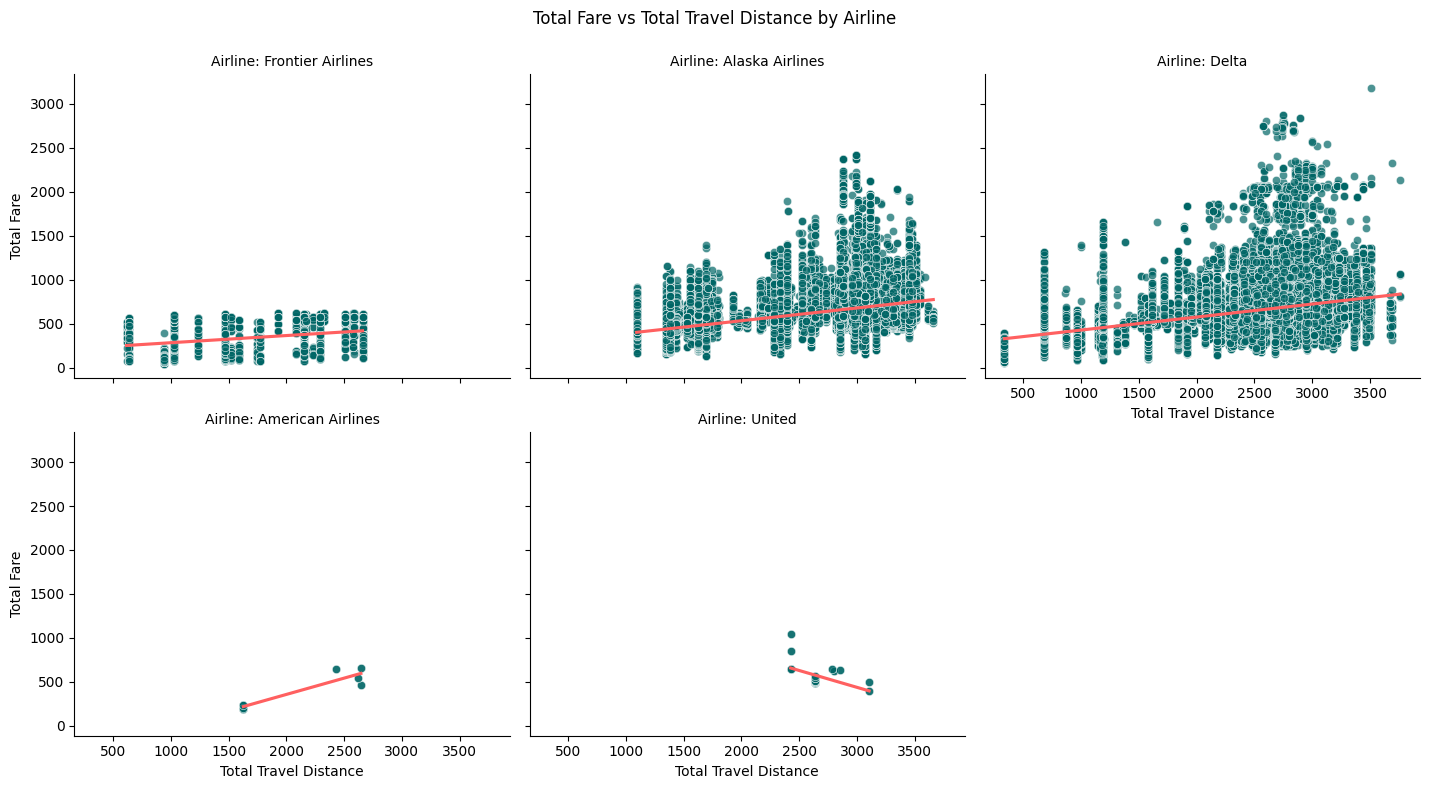

In [ ]:
# FacetGrid for categorized scatterplots with trend line, with 'firstAirlineName' as the category
g = sns.FacetGrid(df, col='firstAirlineName', col_wrap=3, height=4, aspect=1.2)
g.map(sns.scatterplot, 'totalTravelDistance', 'totalFare', alpha=0.7, color='#006666')
g.map(sns.regplot, 'totalTravelDistance', 'totalFare', scatter=False, color='#ff6060', ci=None)
g.set_axis_labels('Total Travel Distance', 'Total Fare')
g.set_titles('Airline: {col_name}')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Total Fare vs Total Travel Distance by Airline')
plt.show()

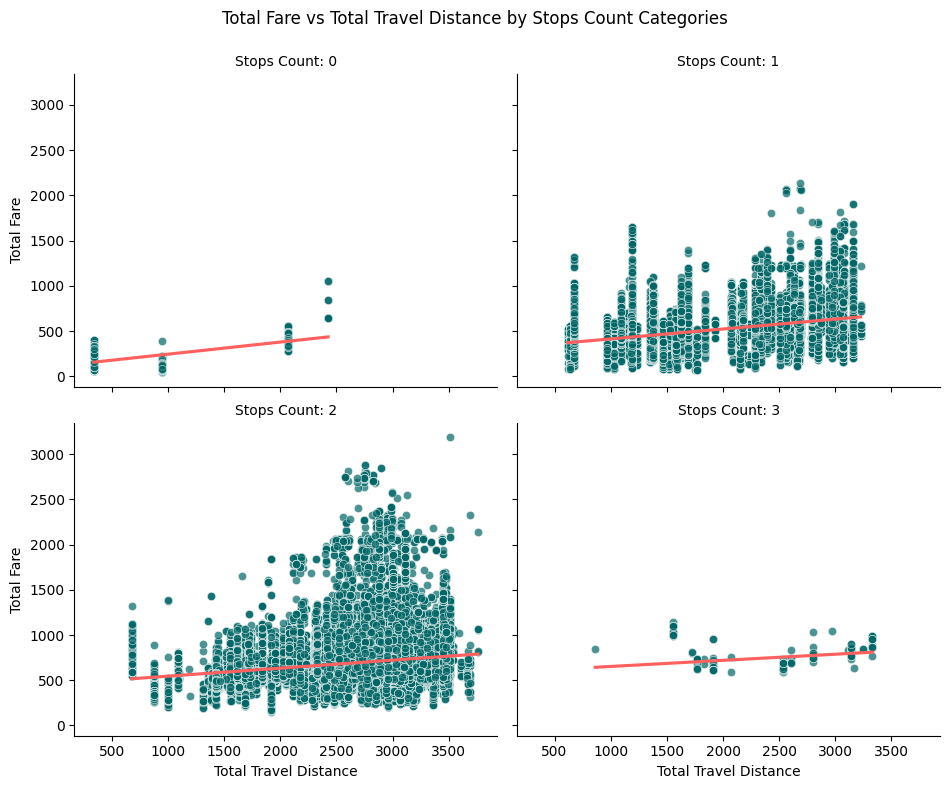

In [ ]:
# FacetGrid for categorized scatterplots by transit count with trend line
g = sns.FacetGrid(df, col='transits_count', col_wrap=2, height=4, aspect=1.2)
g.map(sns.scatterplot, 'totalTravelDistance', 'totalFare', alpha=0.7, color='#006666') # trend line using regplot
g.map(sns.regplot, 'totalTravelDistance', 'totalFare', scatter=False, color='#ff6060', ci=None)
g.set_axis_labels('Total Travel Distance', 'Total Fare')
g.set_titles('Stops Count: {col_name}')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Total Fare vs Total Travel Distance by Stops Count Categories')
plt.show()

In [ ]:
df.head()

legId searchDate flightDate startingAirport  \
0  e1b137527b9175d7d930c3af82e70ae0 2022-04-19 2022-05-20             OAK   
4  4a42bbf77211b4afa7b9e14005949120 2022-04-19 2022-05-20             OAK   
5  9157572cdd530976f707a162a4fcfde8 2022-04-19 2022-05-20             OAK   
7  e8baed3d41a0c35856f7591a5baad060 2022-04-19 2022-05-20             OAK   
8  965e29ef7e8d11bf05f723a28ab8e4e0 2022-04-19 2022-05-20             OAK   

  destinationAirport  travelDuration  isBasicEconomy  isRefundable  isNonStop  \
0                ATL            7.87           False         False      False   
4                ATL           14.20           False         False      False   
5                ATL            9.13            True         False      False   
7                ATL           13.23           False         False      False   
8                ATL           12.67           False         False      False   

   totalFare  ...  segmentsDurationInSeconds segmentsDistance transits_count  \
0     103.98  ...                9180||10620        943||1207              1   
4     307.21  ...                7500||17580        672||2178              1   
5     318.60  ...                7620||17820        672||2178              1   
7     410.69  ...          4860||13320||4380   338||1615||332              2   
8     437.71  ...           7020||9960||7980   588||1078||811              2   

  days_to_flight searchDayOfWeek flightDayOfWeek searchMonth flightMonth  \
0             31         Tuesday          Friday       April         May   
4             31         Tuesday          Friday       April         May   
5             31         Tuesday          Friday       April         May   
7             31         Tuesday          Friday       April         May   
8             31         Tuesday          Friday       April         May   

    firstAirlineName days_category  
0  Frontier Airlines         30-40  
4    Alaska Airlines         30-40  
5    Alaska Airlines         30-40  
7              Delta         30-40  
8              Delta         30-40  

[5 rows x 30 columns]

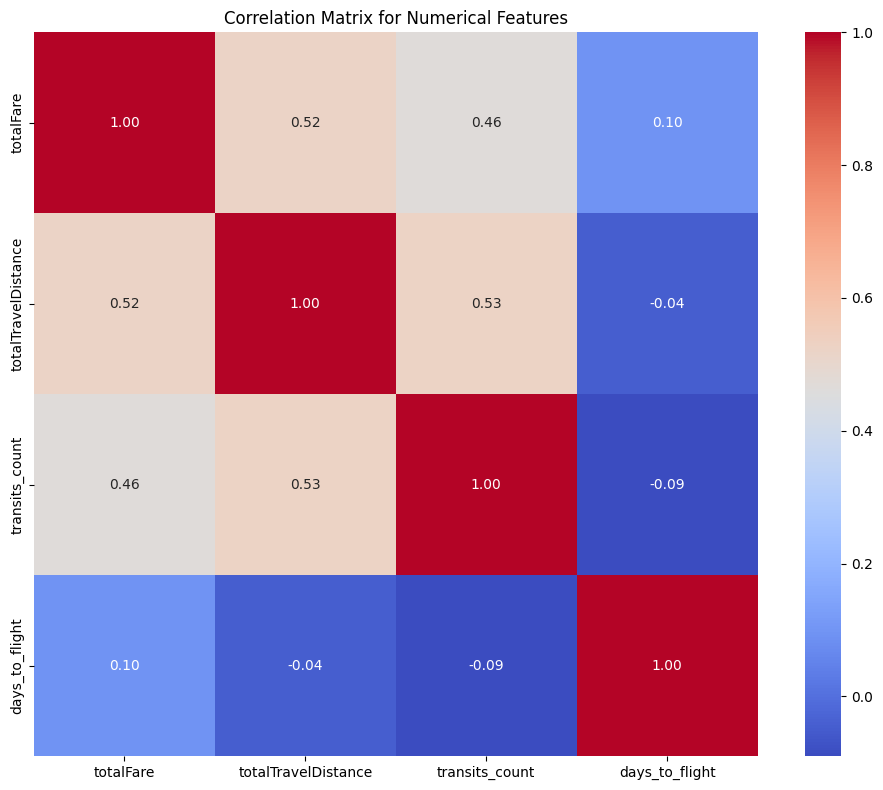

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = df[['totalFare', 'totalTravelDistance', 'transits_count', 'days_to_flight']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, square=True)
plt.title('Correlation Matrix for Numerical Features')
plt.tight_layout()
plt.show()

In [ ]:
df.head(10)

legId searchDate flightDate startingAirport  \
0   e1b137527b9175d7d930c3af82e70ae0 2022-04-19 2022-05-20             OAK   
4   4a42bbf77211b4afa7b9e14005949120 2022-04-19 2022-05-20             OAK   
5   9157572cdd530976f707a162a4fcfde8 2022-04-19 2022-05-20             OAK   
7   e8baed3d41a0c35856f7591a5baad060 2022-04-19 2022-05-20             OAK   
8   965e29ef7e8d11bf05f723a28ab8e4e0 2022-04-19 2022-05-20             OAK   
9   50aae8333ddca38814b9756bba08daad 2022-04-19 2022-05-20             OAK   
10  1bcae14b07cf97de8c79e2668cbd5af9 2022-04-19 2022-05-20             OAK   
11  2ed88461df0f3e22d597c6925044f6a9 2022-04-19 2022-05-20             OAK   
12  f53f16bfc82c4051ada46eb9c67b0840 2022-04-19 2022-05-20             OAK   
13  28a0831e19946fb684d14afed16629f4 2022-04-19 2022-05-20             OAK   

   destinationAirport  travelDuration  isBasicEconomy  isRefundable  \
0                 ATL            7.87           False         False   
4                 ATL           14.20           False         False   
5                 ATL            9.13            True         False   
7                 ATL           13.23           False         False   
8                 ATL           12.67           False         False   
9                 ATL           12.78           False         False   
10                ATL           13.83           False         False   
11                ATL           15.10           False         False   
12                ATL            9.70           False         False   
13                ATL           13.13           False         False   

    isNonStop  totalFare  ...  segmentsDurationInSeconds segmentsDistance  \
0       False     103.98  ...                9180||10620        943||1207   
4       False     307.21  ...                7500||17580        672||2178   
5       False     318.60  ...                7620||17820        672||2178   
7       False     410.69  ...          4860||13320||4380   338||1615||332   
8       False     437.71  ...           7020||9960||7980   588||1078||811   
9       False     449.70  ...           7020||9540||7500    588||992||725   
10      False     449.70  ...           7020||9540||7680    588||992||725   
11      False     449.70  ...           7020||9540||7440    588||992||725   
12      False     461.61  ...                7200||17520        672||2178   
13      False     467.21  ...                7200||17520        672||2178   

   transits_count days_to_flight searchDayOfWeek flightDayOfWeek searchMonth  \
0               1             31         Tuesday          Friday       April   
4               1             31         Tuesday          Friday       April   
5               1             31         Tuesday          Friday       April   
7               2             31         Tuesday          Friday       April   
8               2             31         Tuesday          Friday       April   
9               2             31         Tuesday          Friday       April   
10              2             31         Tuesday          Friday       April   
11              2             31         Tuesday          Friday       April   
12              1             31         Tuesday          Friday       April   
13              1             31         Tuesday          Friday       April   

   flightMonth   firstAirlineName days_category  
0          May  Frontier Airlines         30-40  
4          May    Alaska Airlines         30-40  
5          May    Alaska Airlines         30-40  
7          May              Delta         30-40  
8          May              Delta         30-40  
9          May              Delta         30-40  
10         May              Delta         30-40  
11         May              Delta         30-40  
12         May    Alaska Airlines         30-40  
13         May    Alaska Airlines         30-40  

[10 rows x 30 columns]

## Time_series Visualizations

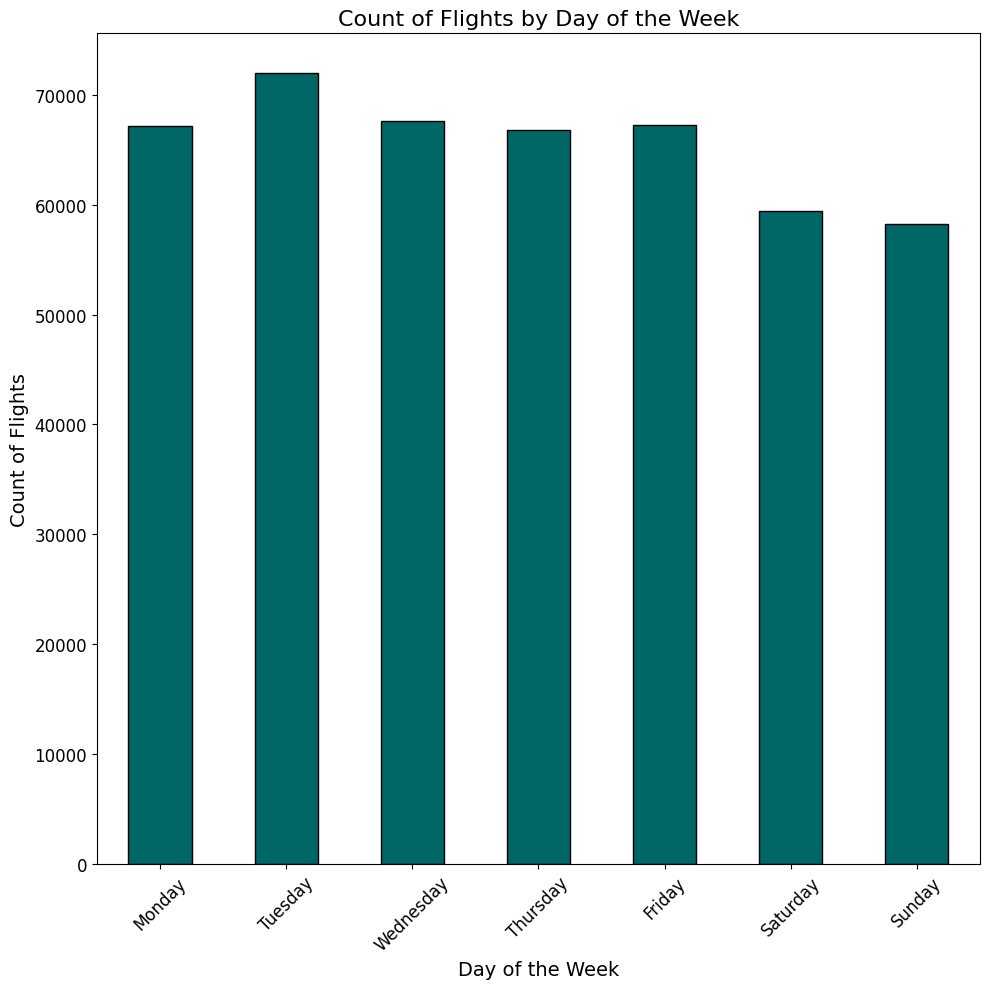

In [ ]:
count_per_day = df['flightDayOfWeek'].value_counts()
# Sort the index to ensure days are in the correct order, stored as strings like 'Monday', 'Tuesday', etc.
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
count_per_day = count_per_day.reindex(day_order)
# Plot the counts
plt.figure(figsize=(10, 10))
count_per_day.plot(kind='bar', color='#006666', edgecolor='black')
plt.title('Count of Flights by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Count of Flights', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

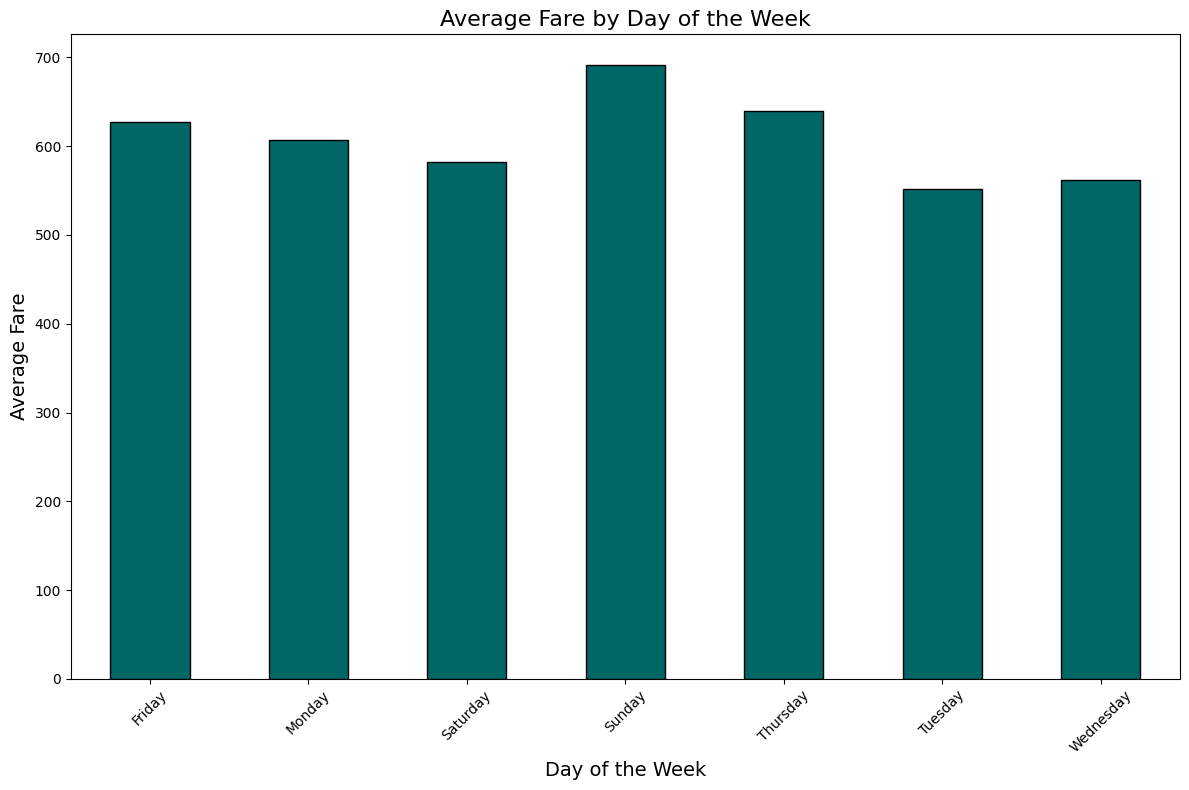

In [ ]:
# Group by flightDayOfWeek and calculate the average fare
avg_fare_per_dayofweek = df.groupby('flightDayOfWeek')['totalFare'].mean()
# Plot the average fare by day of the week
plt.figure(figsize=(12, 8))
avg_fare_per_dayofweek.plot(kind='bar', color='#006666', edgecolor='black')
# titles and labels
plt.title('Average Fare by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Average Fare', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


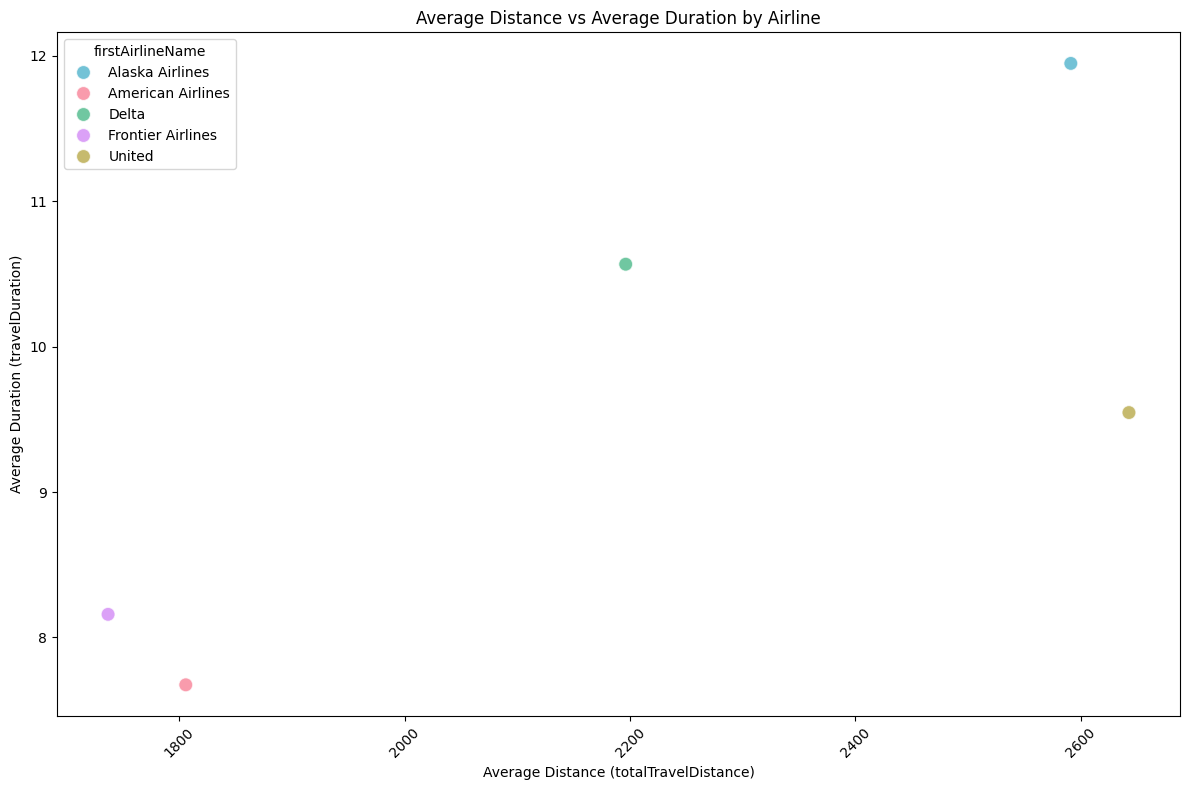

In [ ]:
# Group by 'destinationAirport' and calculate the average of 'segmentsDistance' and 'travelDuration'
avg_distance_duration = df.groupby('firstAirlineName')[['totalTravelDistance', 'travelDuration']].mean().reset_index()
plt.figure(figsize=(12, 8))
# Scatter plot with average distance on the x-axis and average duration on the y-axis
sns.scatterplot(
    data=avg_distance_duration,
    x='totalTravelDistance', y='travelDuration', hue='firstAirlineName', palette=color5_mapping, s=100, alpha=0.7)
plt.title('Average Distance vs Average Duration by Airline')
plt.xlabel('Average Distance (totalTravelDistance)')
plt.ylabel('Average Duration (travelDuration)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Monitoring Change in Variables of Interest with Time

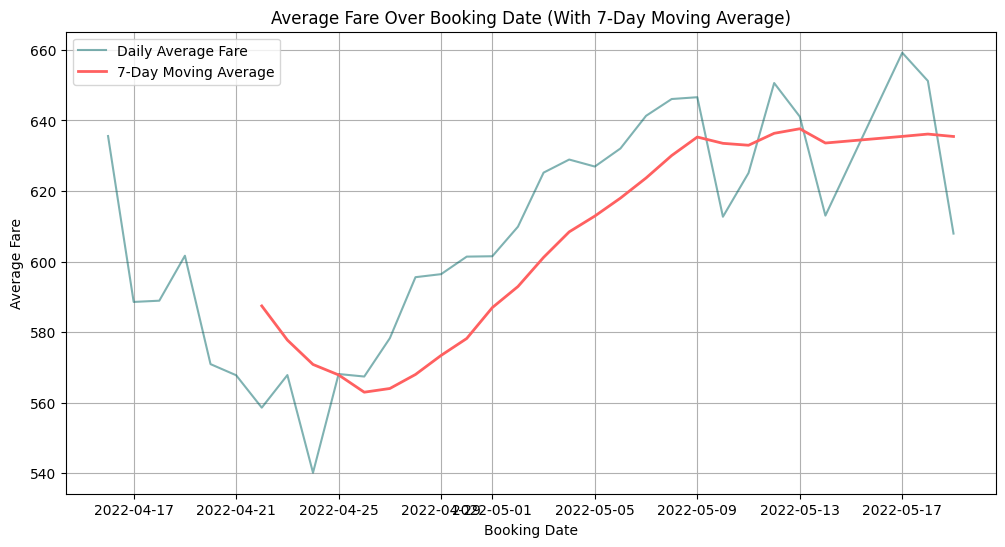

In [ ]:
# Group by searchDate and calculate average fare
avg_fare_over_time = df.groupby('searchDate')['totalFare'].mean()
avg_fare_over_time.index = pd.to_datetime(avg_fare_over_time.index)
moving_avg_fare = avg_fare_over_time.rolling(window=7).mean() # get the moving average (e.g., 7-day window)
# Plot the moving average fare over searchDate
plt.figure(figsize=(12, 6))
plt.plot(avg_fare_over_time, label='Daily Average Fare', alpha=0.5, color='#006666')  # Original averages
plt.plot(moving_avg_fare, label='7-Day Moving Average', color='#ff6060', linewidth=2)  # Moving average
plt.title('Average Fare Over Booking Date (With 7-Day Moving Average)')
plt.xlabel('Booking Date')
plt.ylabel('Average Fare')
plt.legend()
plt.grid()
plt.show()

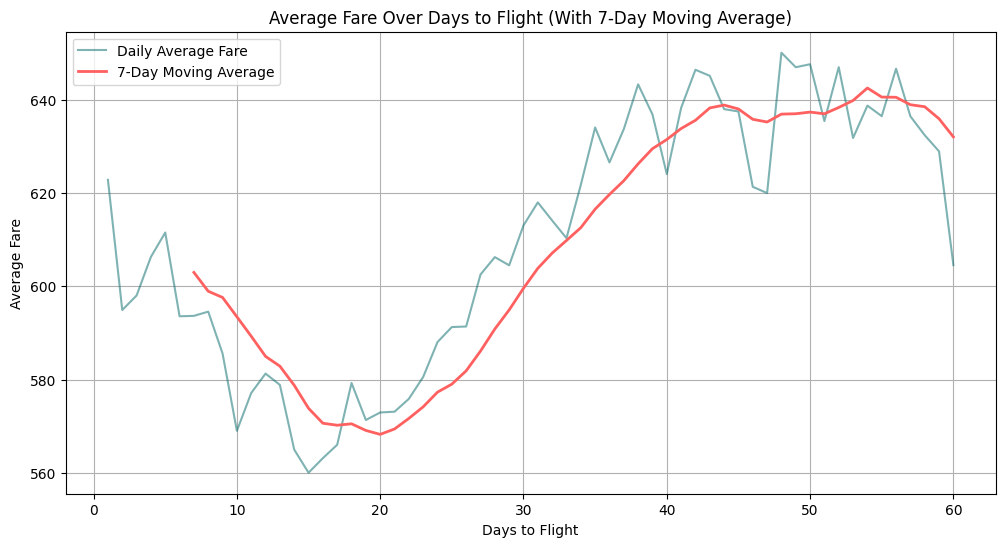

In [ ]:
# Group by 'days_to_flight' and calculate the average fare
avg_fare_over_time_daystoflight = df.groupby('days_to_flight')['totalFare'].mean()
moving_avg_fare_daystoflight = avg_fare_over_time_daystoflight.rolling(window=7).mean()
# Plot the average fare and its moving average
plt.figure(figsize=(12, 6))
plt.plot(avg_fare_over_time_daystoflight, label='Daily Average Fare', alpha=0.5, color='#006666')  # Original averages
plt.plot(moving_avg_fare_daystoflight, label='7-Day Moving Average', color='#ff6060', linewidth=2)  # Moving average
plt.title('Average Fare Over Days to Flight (With 7-Day Moving Average)')
plt.xlabel('Days to Flight')
plt.ylabel('Average Fare')
plt.legend()
plt.grid()
plt.show()

Monitoring Change in Variables of Interest with Space

<ipython-input-199-7678e937027a>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_fare_destination_based = df.groupby('destinationAirport')['totalFare'].mean().sort_values()


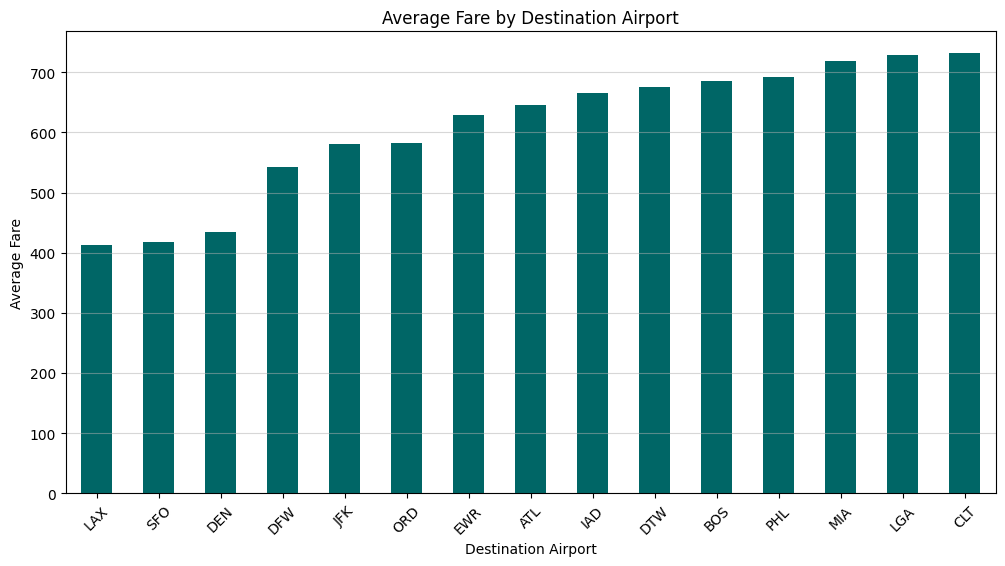

In [ ]:
# Average fare by destination airport
avg_fare_destination_based = df.groupby('destinationAirport')['totalFare'].mean().sort_values()
# Plot the average fare by starting airport
plt.figure(figsize=(12, 6))
avg_fare_destination_based.plot(kind='bar', color='#006666')
plt.title('Average Fare by Destination Airport')
plt.xlabel('Destination Airport')
plt.ylabel('Average Fare')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.5)
plt.show()

In [ ]:
df.head()

legId searchDate flightDate startingAirport  \
0  e1b137527b9175d7d930c3af82e70ae0 2022-04-19 2022-05-20             OAK   
4  4a42bbf77211b4afa7b9e14005949120 2022-04-19 2022-05-20             OAK   
5  9157572cdd530976f707a162a4fcfde8 2022-04-19 2022-05-20             OAK   
7  e8baed3d41a0c35856f7591a5baad060 2022-04-19 2022-05-20             OAK   
8  965e29ef7e8d11bf05f723a28ab8e4e0 2022-04-19 2022-05-20             OAK   

  destinationAirport  travelDuration  isBasicEconomy  isRefundable  isNonStop  \
0                ATL            7.87           False         False      False   
4                ATL           14.20           False         False      False   
5                ATL            9.13            True         False      False   
7                ATL           13.23           False         False      False   
8                ATL           12.67           False         False      False   

   totalFare  ...  segmentsDurationInSeconds segmentsDistance transits_count  \
0     103.98  ...                9180||10620        943||1207              1   
4     307.21  ...                7500||17580        672||2178              1   
5     318.60  ...                7620||17820        672||2178              1   
7     410.69  ...          4860||13320||4380   338||1615||332              2   
8     437.71  ...           7020||9960||7980   588||1078||811              2   

  days_to_flight searchDayOfWeek flightDayOfWeek searchMonth flightMonth  \
0             31         Tuesday          Friday       April         May   
4             31         Tuesday          Friday       April         May   
5             31         Tuesday          Friday       April         May   
7             31         Tuesday          Friday       April         May   
8             31         Tuesday          Friday       April         May   

    firstAirlineName days_category  
0  Frontier Airlines         30-40  
4    Alaska Airlines         30-40  
5    Alaska Airlines         30-40  
7              Delta         30-40  
8              Delta         30-40  

[5 rows x 30 columns]

<ipython-input-181-65db55346185>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='searchDate', y='totalFare', hue='firstAirlineName', data=df, palette=color5_mapping, ci=None)


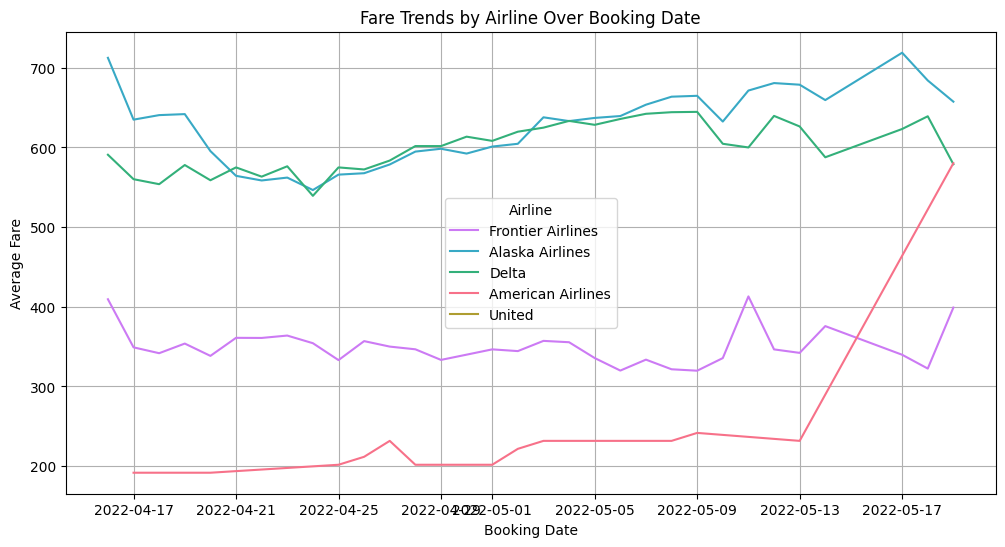

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='searchDate', y='totalFare', hue='firstAirlineName', data=df, palette=color5_mapping, ci=None)
plt.title('Fare Trends by Airline Over Booking Date')
plt.xlabel('Booking Date')
plt.ylabel('Average Fare')
plt.legend(title='Airline')
plt.grid()
plt.show()

<ipython-input-194-9e2dd2fdc759>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_distance_duration = df.groupby('destinationAirport')[['totalTravelDistance', 'travelDuration']].mean().reset_index()


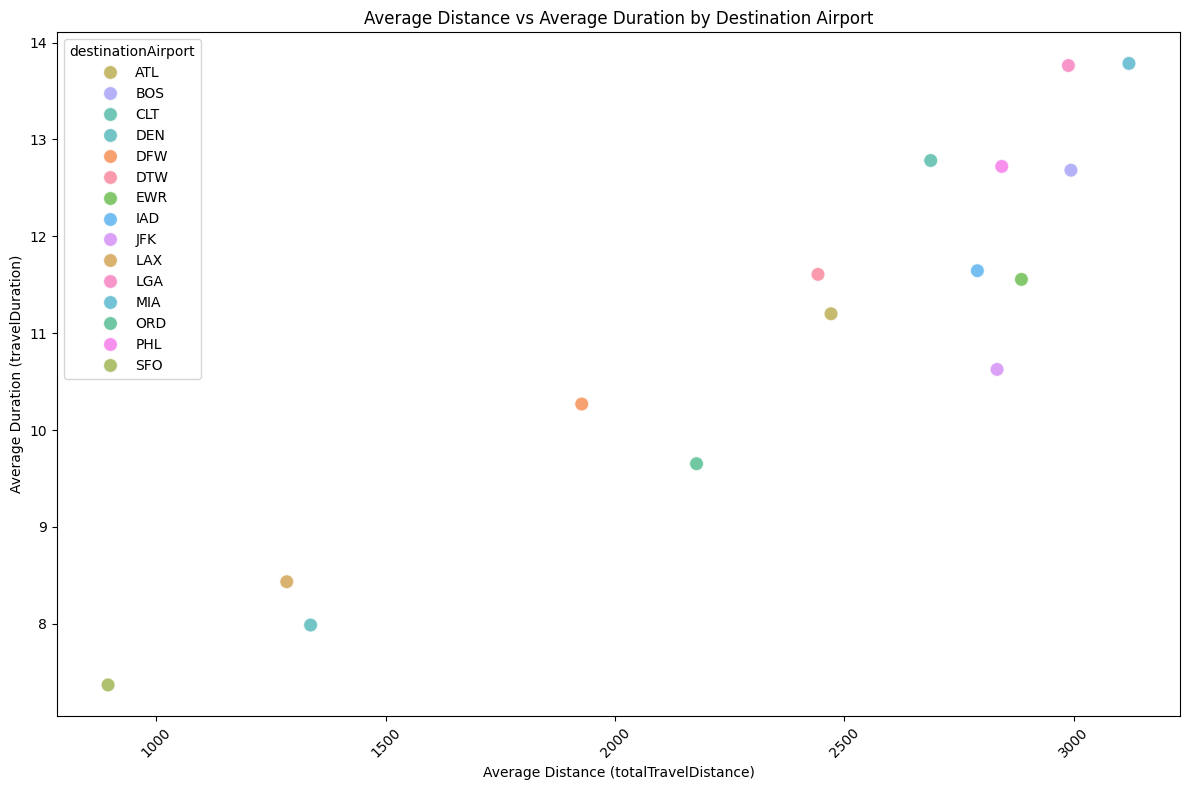

In [ ]:
# Group by 'destinationAirport' and calculate the average of 'segmentsDistance' and 'travelDuration'
avg_distance_duration = df.groupby('destinationAirport')[['totalTravelDistance', 'travelDuration']].mean().reset_index()
plt.figure(figsize=(12, 8))
# Scatter plot with average distance on the x-axis and average duration on the y-axis
sns.scatterplot(
    data=avg_distance_duration,
    x='totalTravelDistance', y='travelDuration', s=100, alpha=0.7, hue='destinationAirport', palette=color15_mapping)
# the title and labels
plt.title('Average Distance vs Average Duration by Destination Airport')
plt.xlabel('Average Distance (totalTravelDistance)')
plt.ylabel('Average Duration (travelDuration)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()